In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, Normalizer, normalize
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV

ОПИСАНИЕ ЗАДАЧИ
Датасет описывает несколько показателей популярности и свойст, а также их влияние на качество вина. Данные могут быть использованы для классификации или регрессионных задач. Классы упорядочены и несбалансированы. Задача состоит в предсказании качества вина с использованием имеющихся данных.

Датасет содержит 7500 различных видов красных вин из Испании с 11 характеристиками, которые описывают их цену, рейтинг и некоторые характеристики вкуса.

Информация об атрибутах
- winery: Название винодельни
- wine: Название вина
- year: Год сбора винограда
- rating: Средний рейтинг, присвоенный вину пользователями [от 1 до 5]
- num_reviews: Количество пользователей, оставивших отзыв о вине
- country: Страна происхождения [Испания]
- region: Регион вина
- price: Цена в евро [€]
- type: Вид вина
- body: Оценка тела, определяемая насыщенностью и плотностью вина во рту [от 1 до 5]
- acidity: Оценка кислотности, определяемая "сжимающим" или терпким вкусом вина; это то, что делает вино освежающим (оценка качества вина) [от 1 до 5]

ЗАГРУЗКА ДАННЫХ

In [80]:
url = "https://raw.githubusercontent.com/klakhov/ml-learning/main/wines_SPA.csv"
df = pd.read_csv(url)
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


ВИЗУАЛИЗАЦИЯ

In [82]:
df.describe(include="all")

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
count,7500,7500,7498,7500.000000,7500.000000,7500,7500,7500.000000,6955,6331.000000,6331.000000
unique,480,847,71,NaN,NaN,1,76,NaN,21,NaN,NaN
top,Contino,Reserva,2011,NaN,NaN,Espana,Rioja,NaN,Rioja Red,NaN,NaN
freq,457,467,1190,NaN,NaN,7500,2440,NaN,2357,NaN,NaN
mean,NaN,NaN,NaN,4.254933,451.109067,NaN,NaN,60.095822,NaN,4.158427,2.946612
std,NaN,NaN,NaN,0.118029,723.001856,NaN,NaN,150.356676,NaN,0.583352,0.248202
min,NaN,NaN,NaN,4.200000,25.000000,NaN,NaN,4.990000,NaN,2.000000,1.000000
25%,NaN,NaN,NaN,4.200000,389.000000,NaN,NaN,18.900000,NaN,4.000000,3.000000
50%,NaN,NaN,NaN,4.200000,404.000000,NaN,NaN,28.530000,NaN,4.000000,3.000000
75%,NaN,NaN,NaN,4.200000,415.000000,NaN,NaN,51.350000,NaN,5.000000,3.000000


<Axes: >

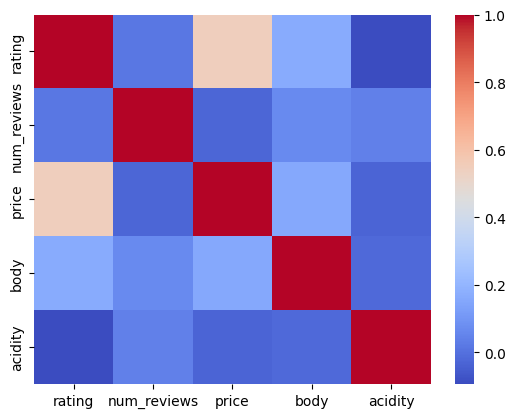

In [83]:
corr_mat = df.corr(numeric_only=True)
sns.heatmap(corr_mat, cmap='coolwarm')

ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ

Text(0.5, 23.52222222222222, 'Missing Values')

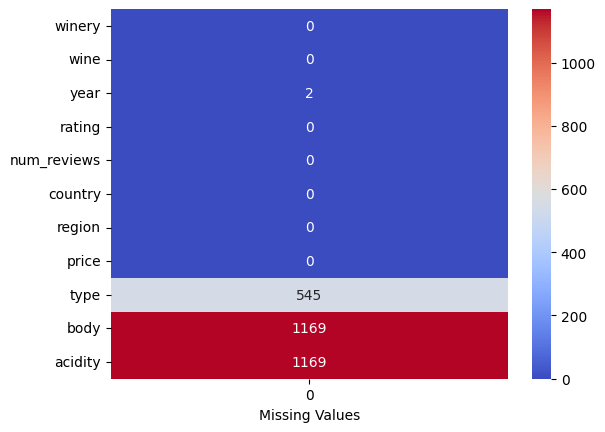

In [84]:
ax = sns.heatmap(df.isna().sum().to_frame(), annot=True, fmt='d',cmap='coolwarm')
ax.set_xlabel("Missing Values")

In [85]:
imputer_cols = ['type', 'body', 'acidity', 'year']
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(df[imputer_cols])
df[imputer_cols] = imputer.transform(df[imputer_cols])

Text(0.5, 23.52222222222222, 'Missing Values')

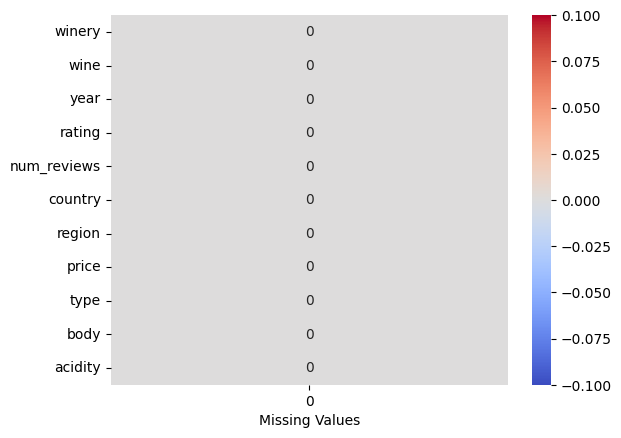

In [86]:
ax = sns.heatmap(df.isna().sum().to_frame(), annot=True, fmt='d',cmap='coolwarm')
ax.set_xlabel("Missing Values")

ЕЩЕ НЕМНОГО ВИЗУАЛИЗАЦИИ

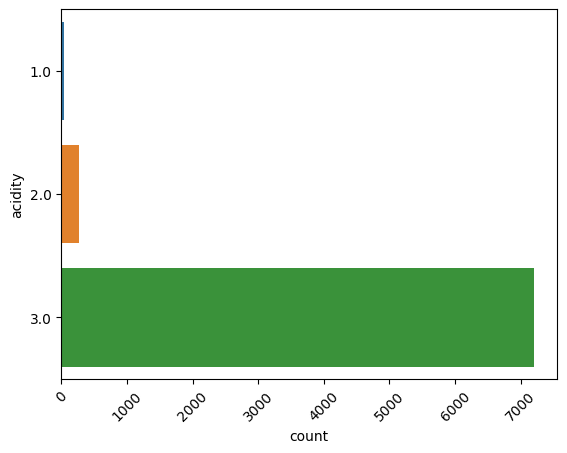

In [87]:
sns.countplot(y=df['acidity'])
plt.xticks(rotation=45)
plt.show()

Заметно что классы сильно несбалансированы

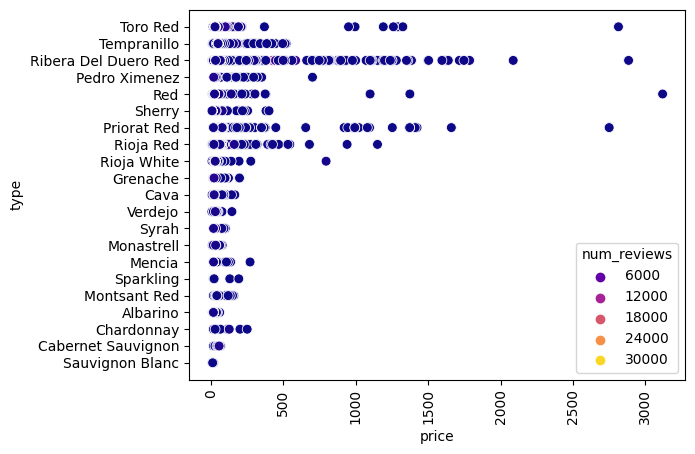

In [88]:
sns.scatterplot(data=df, y='type', x='price', hue='num_reviews', palette='plasma', s=50)
plt.xticks(rotation=90)
plt.show()

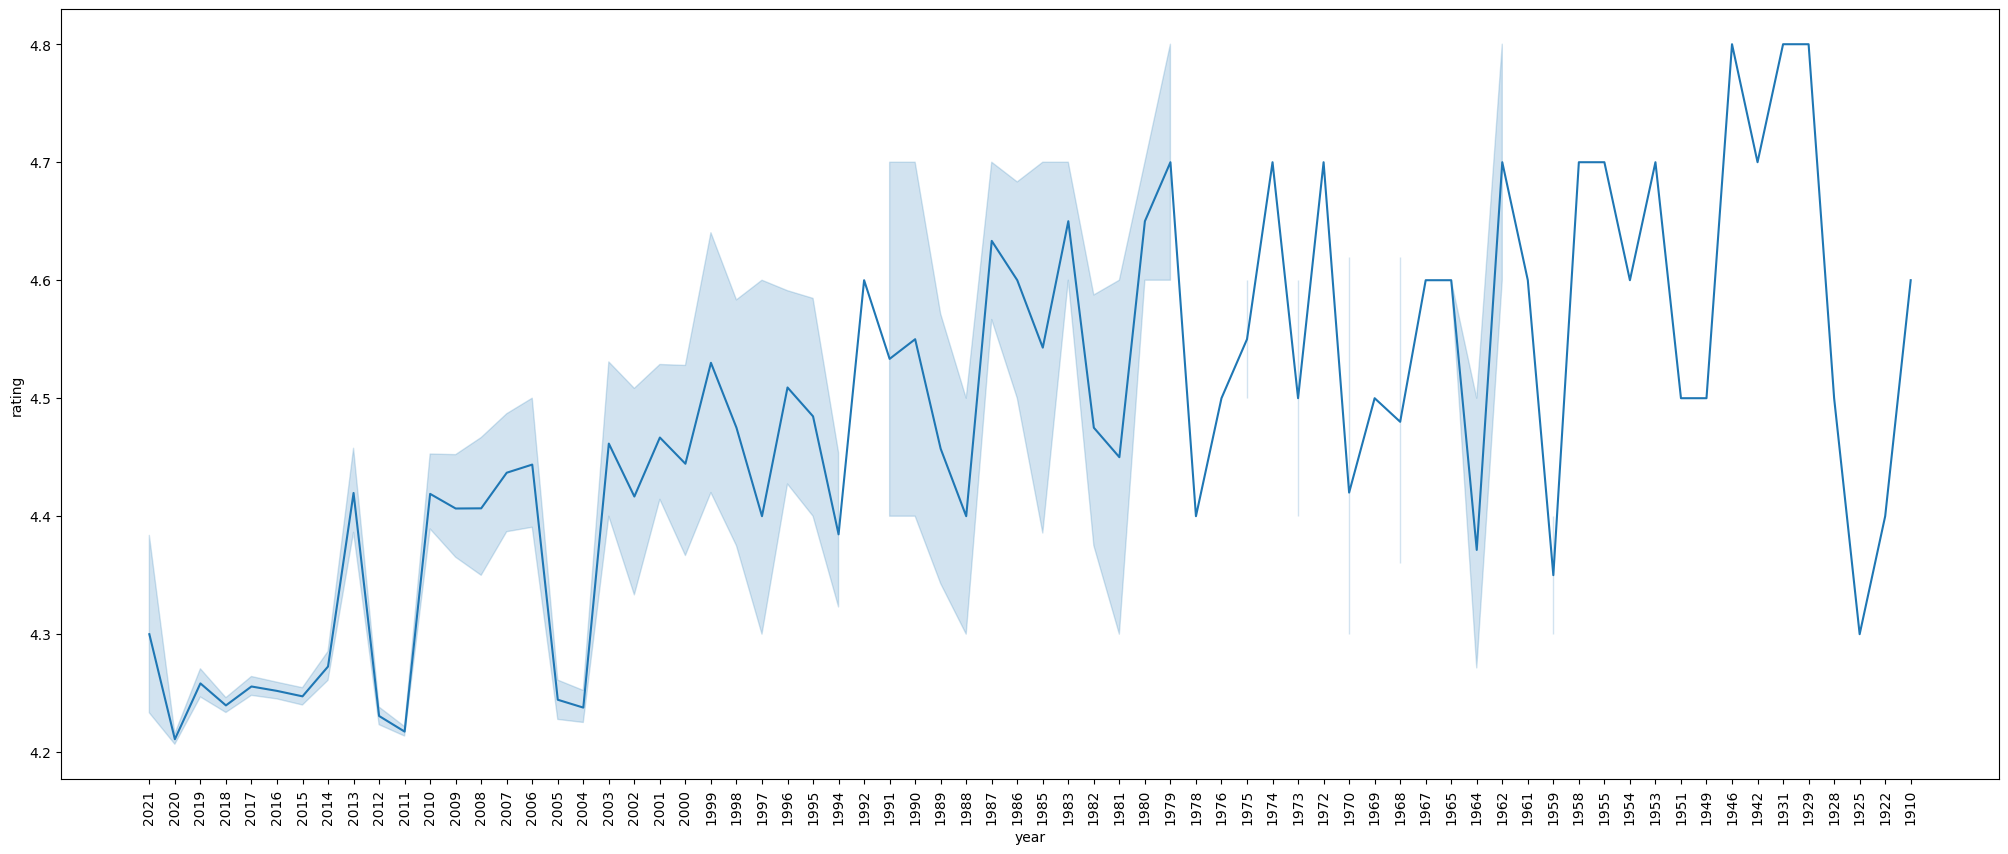

In [89]:
year = df[df['year'] != 'N.V.']
plt.figure(figsize=[25, 10])
sns.lineplot(data=year.sort_values(by=['year'], ascending=False), y='rating', x='year')
plt.xticks(rotation=90)
plt.show()

ОБРАБОТКА КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ

In [90]:
for i in df:
    if df[i].dtypes == 'object':
        df[i] = LabelEncoder().fit_transform(df[i])

In [91]:
df

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,422,759,61,4.9,58,0,69,995.00,19,3,2
1,33,819,66,4.9,31,0,74,313.50,18,2,1
2,447,778,57,4.8,1793,0,57,324.95,11,3,2
3,447,778,47,4.8,1705,0,57,692.96,11,3,2
4,447,778,44,4.8,1309,0,57,778.06,11,3,2
...,...,...,...,...,...,...,...,...,...,...,...
7495,159,619,64,4.2,392,0,59,19.98,12,2,2
7496,158,440,66,4.2,390,0,53,16.76,9,2,2
7497,334,302,65,4.2,390,0,24,24.45,10,2,2
7498,316,342,59,4.2,389,0,57,64.50,11,3,2


НОРМАЛИЗАЦИЯ

In [92]:
numerical_v = ["rating", "num_reviews", "body", "price"]
for i in df:
    if i in numerical_v:
        df[i] = (df[i]-df[i].mean())/df[i].std()


In [93]:
df

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,422,759,61,5.465322,-0.543718,0,69,6.217909,19,1.607082,2
1,33,819,66,5.465322,-0.581062,0,74,1.685354,18,-0.248100,1
2,447,778,57,4.618073,1.855999,0,57,1.761506,11,1.607082,2
3,447,778,47,4.618073,1.734285,0,57,4.209086,11,1.607082,2
4,447,778,44,4.618073,1.186568,0,57,4.775073,11,1.607082,2
...,...,...,...,...,...,...,...,...,...,...,...
7495,159,619,64,-0.465422,-0.081755,0,59,-0.266804,12,-0.248100,2
7496,158,440,66,-0.465422,-0.084521,0,53,-0.288220,9,-0.248100,2
7497,334,302,65,-0.465422,-0.084521,0,24,-0.237075,10,-0.248100,2
7498,316,342,59,-0.465422,-0.085904,0,57,0.029292,11,1.607082,2


ПОДГОТОВКА К ТРЕНИРОВКЕ МОДЕЛИ

In [94]:
df['acidity'].value_counts()

2    7197
1     268
0      35
Name: acidity, dtype: int64

In [95]:
x = df.drop('acidity', axis=1)
y = df['acidity']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

ОБУЧЕНИЕ

KNN

In [98]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)
knn_acc = accuracy_score(y_test, knn_pred)
print("The training accuracy for KNN is:", round(knn.score(x_train, y_train)*100, 2), "%")
print("The testing accuracy for KNN is:", round(knn_acc * 100,2), "%")

The training accuracy for KNN is: 99.14 %
The testing accuracy for KNN is: 98.8 %


In [102]:
# Подбор наилучшего n_neighbours
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(x_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.008952380952380934 3


RANDOM FOREST

In [99]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)
rfc_acc = accuracy_score(y_test, rfc_pred)
print("The training accuracy for Random Forest is:", round(rfc.score(x_train, y_train)*100,2), "%")
print("The testing accuracy for Random Forest is:", round(rfc_acc * 100,2), "%")

The training accuracy for Random Forest is: 99.68 %
The testing accuracy for Random Forest is: 99.51 %


Результаты получились очень хорошие (что даже несколько подозрительно)